In [1]:
import torch
from gen.diffusion.sde import ToroidalDiffusion
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

/home/sherryli/xsli/softwares/anaconda3/envs/nf/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:160: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [10]:
from torus import *

In [5]:
from gen.diffusion.sde import ToroidalDiffusion
import numpy as np

In [6]:
sde = ToroidalDiffusion(sigma_min=0.01,sigma_max=1,ncells=10,
                 max_nsteps=1000,eps=1e-4,periodic_boxlen=2*np.pi)

NoiseSchedule: min=0.1, max=20, t_range=tensor([1.0000e-04, 1.0000e+00])


In [12]:
t = torch.linspace(sde.eps,1,20)

In [13]:
sigma = sde.sigma(t)

In [14]:
sample(sigma)

tensor([ 0.0317,  0.0140, -0.1371,  0.0423,  0.3826,  0.0127, -0.0396, -0.1232,
        -0.2081,  0.2037,  0.3923, -0.2498,  0.9111,  2.4712, -1.3920, -2.0356,
         2.9586,  0.7046,  0.7943,  3.0171], dtype=torch.float64)

In [16]:
norm = score_norm(sigma.numpy())

In [17]:
norm_2 = 1/sde.std_fn(t)**2

In [18]:
norm

array([2.48516747e+02, 1.55025385e+02, 9.79154501e+01, 5.78977084e+01,
       3.54760063e+01, 2.22101548e+01, 1.37343340e+01, 8.14235648e+00,
       5.28905918e+00, 3.14891728e+00, 2.03351268e+00, 1.17983254e+00,
       6.44702568e-01, 2.56318381e-01, 6.23435690e-02, 6.89116305e-03,
       1.96504963e-04, 6.34743977e-07, 5.33721596e-11, 1.42357782e-17])

In [31]:
s = score(sample(sigma).numpy(),sigma.numpy())
s

array([ 5.69605897e+00, -2.93322990e+00,  5.01472697e-01,  6.62442949e+00,
       -1.81936614e+00, -2.47640287e+00, -4.64218547e+00,  6.40463101e+00,
       -5.01643632e-01,  6.35764821e-01,  5.99885161e-01, -2.25891539e+00,
        1.06740835e+00,  5.13843340e-01,  3.14939772e-01, -6.59047279e-02,
       -9.76563031e-03, -3.95432662e-04,  5.39711318e-06, -4.27999363e-09])

In [30]:
import numpy as np
from mcmc.distributions.double_well import DW
data = np.load("/mnt/ssd/ml-boilerplate/logs/runs/DW/periodic/sample.npy")
sys = DW(boxlen=10)
sys.potential(torch.tensor(data))

tensor([[ -7.8103],
        [ -8.0936],
        [ 85.6082],
        [-15.1959],
        [ 29.7149],
        [ 29.7196],
        [104.0842],
        [ 39.0143],
        [  2.8135],
        [-12.8065],
        [ 70.8869],
        [-11.6442],
        [-11.3021],
        [-12.5705],
        [ -2.0697],
        [ 14.0076],
        [ -9.6342],
        [ -3.7809],
        [-17.7417],
        [  7.8984],
        [ 33.1342],
        [ 10.9088],
        [ -4.8403],
        [-10.7760],
        [  3.3982],
        [  0.3261],
        [ -2.3129],
        [ -8.6424],
        [  4.3419],
        [ -4.8314],
        [ 88.1271],
        [-15.0809],
        [ 45.9128],
        [-11.0788],
        [-12.3470],
        [-11.5721],
        [  5.6624],
        [  6.3310],
        [ 71.7770],
        [ 49.8449],
        [ 15.7434],
        [-11.0857],
        [ 35.5266],
        [-15.1430],
        [ -9.3468],
        [-11.0721],
        [-11.3458],
        [ 21.4510],
        [-11.7860],
        [-15.4246],


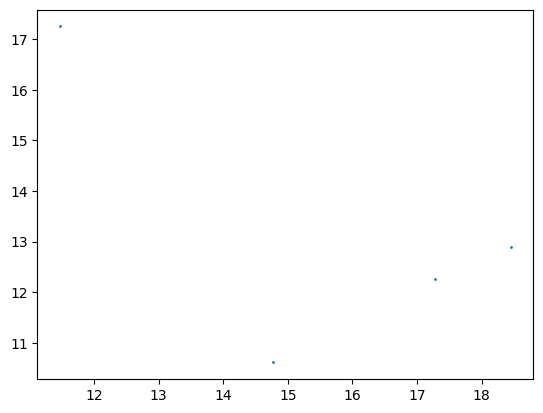

In [161]:
import matplotlib.pyplot as plt
plt.scatter(data[2,:,0], data[2,:,1], s=1)

In [79]:
sde = ToroidalDiffusion(periodic_boxlen=1.0)

NoiseSchedule: min=0.1, max=20, t_range=tensor([1.0000e-04, 1.0000e+00])


In [141]:
x = (0.1*torch.randn(1000,10, 2))%1

(array([1.606e+03, 1.470e+03, 1.427e+03, 1.247e+03, 1.049e+03, 8.810e+02,
        6.720e+02, 4.920e+02, 3.540e+02, 2.890e+02, 1.890e+02, 1.020e+02,
        9.000e+01, 2.800e+01, 1.900e+01, 1.900e+01, 7.000e+00, 6.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 7.000e+00, 1.600e+01, 1.800e+01,
        3.900e+01, 8.100e+01, 1.230e+02, 1.860e+02, 2.720e+02, 3.840e+02,
        5.210e+02, 6.750e+02, 9.180e+02, 1.104e+03, 1.255e+03, 1.349e+03,
        1.530e+03, 1.567e+03]),
 array([1.27066260e-05, 2.00123508e-02, 4.00119945e-02, 6.00116402e-02,
        8.00112858e-02, 1.00010931e-01, 1.20010577e-01, 1.40010223e-01,
        1.60009861e-01, 1.80009514e-01, 2.00009152e-01, 2.20008790e-01,
        2.40008444e-01, 2.60008097e-01, 2.80007720e-01, 3.00007373e-01,
        3.20007026e-01, 3.40006649e-01, 3.60006303e-01, 3.80005956e-01,
        4.000056

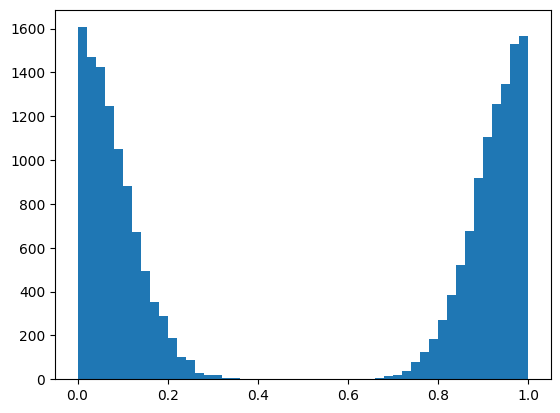

In [142]:
plt.hist(x.flatten().detach().numpy(), bins=50)

In [143]:
t = 0.5*torch.ones(1000)
output = sde.forward(x, t)

In [144]:
diffused_x = output['diffused_x']
score = output['score']
score_2 = output['score_2']
weight = output['weight']
diffused_x_2 = output['diffused_x_2']

In [145]:
score-score_2

tensor([[[ 0.0000e+00, -9.5367e-07],
         [ 4.5300e-06,  0.0000e+00],
         [ 0.0000e+00,  1.9073e-06],
         ...,
         [ 7.6294e-06,  0.0000e+00],
         [-1.4901e-06, -4.7684e-07],
         [ 0.0000e+00,  3.8147e-06]],

        [[-5.7220e-06, -5.9605e-06],
         [ 7.1526e-07,  2.8610e-06],
         [-3.8147e-06,  0.0000e+00],
         ...,
         [-5.7220e-06,  4.7684e-06],
         [-6.6757e-06,  5.7220e-06],
         [-4.7684e-07,  5.4836e-06]],

        [[-4.7684e-07,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00],
         [-9.5367e-07,  0.0000e+00],
         ...,
         [ 1.1921e-06, -5.7220e-06],
         [ 0.0000e+00,  5.2452e-06],
         [-1.4305e-06, -5.7220e-06]],

        ...,

        [[ 2.8610e-06,  2.9802e-06],
         [-7.4506e-07,  0.0000e+00],
         [ 0.0000e+00, -5.7220e-06],
         ...,
         [-1.9073e-06, -5.7220e-06],
         [ 3.5763e-06,  0.0000e+00],
         [-6.3181e-06,  5.7220e-06]],

        [[ 6.6757e-06, -3.7253e-06

(array([2.83253462, 2.59503172, 2.71503293, 2.60253205, 2.25502735,
        1.95252368, 1.920024  , 1.56251895, 1.36501656, 1.06501292,
        0.9975121 , 0.75500916, 0.54000655, 0.46750602, 0.31750361,
        0.26250338, 0.18250235, 0.13250151, 0.09750126, 0.07750088,
        0.03750048, 0.03750043, 0.02000026, 0.01000011, 0.00500006,
        0.01250016, 0.01000013, 0.02500032, 0.02000026, 0.06250062,
        0.07500097, 0.12000154, 0.13250171, 0.15000193, 0.23750235,
        0.37500483, 0.44500573, 0.64000824, 0.72000712, 0.9550123 ,
        1.13001455, 1.33751722, 1.69252179, 1.90751887, 2.08502684,
        2.27252926, 2.48503199, 2.71002681, 2.85503676, 2.74003528]),
 array([8.34465027e-06, 2.00081002e-02, 4.00078557e-02, 6.00076132e-02,
        8.00073668e-02, 1.00007124e-01, 1.20006882e-01, 1.40006632e-01,
        1.60006389e-01, 1.80006146e-01, 2.00005904e-01, 2.20005661e-01,
        2.40005419e-01, 2.60005176e-01, 2.80004919e-01, 3.00004691e-01,
        3.20004433e-01, 3.4000

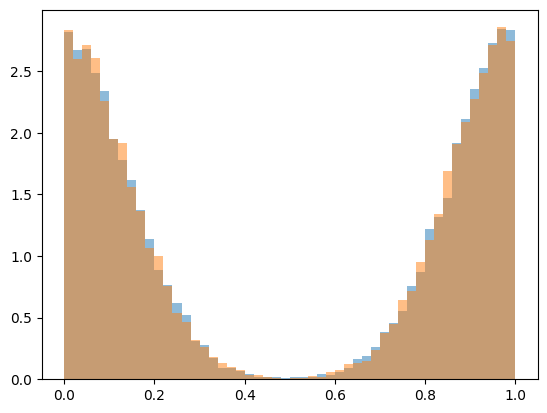

In [146]:
plt.hist(diffused_x_2.flatten().detach().numpy(), bins=50,density=True, alpha=0.5)
plt.hist(diffused_x.flatten().detach().numpy(), bins=50,density=True, alpha=0.5)

In [150]:
print(score.shape)

torch.Size([1000, 10, 2])


In [153]:
print(torch.mean(torch.norm(score.reshape(len(score),-1), dim=1)**2))
print(1/weight)

tensor(2003.3657)
tensor([2121.5693, 2107.0911, 2042.9276, 2132.4460, 2085.9033, 1886.7762,
        2034.2126, 1993.0688, 2060.0007, 1951.6116, 2033.6121, 1893.2747,
        1972.7949, 1980.5592, 2041.8892, 2069.2488, 1960.1835, 2001.5686,
        2055.1042, 2071.6506, 1984.8588, 1951.7094, 2052.7368, 2028.9968,
        2020.1892, 2049.6123, 1938.8474, 1953.3367, 2002.9827, 2045.7898,
        2035.6627, 1973.4493, 2110.1594, 2176.9932, 2041.3030, 2020.5565,
        2027.2502, 2033.7594, 1989.3062, 1982.0791, 1907.8655, 1865.5110,
        2003.5781, 2013.8446, 1969.9878, 1987.8823, 1881.6729, 1951.4401,
        2002.8281, 1923.5372, 1917.5864, 1996.0469, 1974.6451, 2005.8784,
        2004.4503, 2041.2455, 2044.0323, 2018.4836, 1964.1887, 1944.1113,
        2028.5723, 1956.4351, 2001.0820, 1987.9780, 1987.2727, 1991.5648,
        1942.2188, 1850.1542, 1865.4376, 1975.7389, 1939.2433, 2018.6600,
        2033.4122, 1777.3092, 1959.3854, 2028.9154, 2040.9033, 2014.1346,
        1942.3036, 1

In [148]:
print(torch.mean(1/weight))
torch.std(1/weight)

tensor(1999.3330)


tensor(64.3484)